In [4]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


from fairlearn.datasets import fetch_adult
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, demographic_parity_ratio, equalized_odds_difference, equalized_odds_ratio
from fairlearn.reductions import ExponentiatedGradient

In [5]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, generate_init


from agent import Person

from model import VirusModel, VirusModel_baseline




In [6]:
parameters = {
    'my_parameter':42,
    'agents':100,
    'steps':20,
    'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
    'acc': 0.8, # accuracy of fraud prdediction
    'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
    #'wealth_impact'
    'clf': 'hist', # None, 'hist'
    'expi': None
    
}
sample = ap.Sample(parameters, n=1)
model_baseline = VirusModel_baseline(parameters)
exp = ap.Experiment(VirusModel_baseline, sample, iterations =2, record = True)
results_baseline = exp.run() 
df_baseline = results_baseline['variables']['Person']

Scheduled runs: 20
0.5805


/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/uni/miniconda

KeyboardInterrupt: 

In [ ]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head(100) 

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         1      1   0.286444  0.37454           0      0     0       0   
                 2   0.294649  0.37454           0      1     0       0   
                 3   0.303330  0.37454           0      1     0       0   
                 4   0.312531  0.37454           0      0     0       0   
                 5   0.322299  0.37454           0      0     0       0   
...                       ...      ...         ...    ...   ...     ...   
          5      16  0.696930  0.37454           0      0     1       0   
                 17  0.745502  0.37454           0      0     1       0   
                 18  0.801079  0.37454           0      0     1       0   
                 19  0.865252  0.37454           0      0     1       0   
                 20  0.940118  0.37454           0      0     1       0   

                     convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                           
0         1      1           0    0.500000  0.453488    0.500000  0.453488   
                 2           0    0.575758  0.534884    0.575758  0.534884   
                 3           0    0.509091  0.520930    0.509091  0.520930   
                 4           0    0.349650  0.437500    0.349650  0.437500   
                 5           0    0.316327  0.396226    0.316327  0.396226   
...                        ...         ...       ...         ...       ...   
          5      16          0    0.577899  0.366667    0.577899  0.366667   
                 17          0    0.333333  0.487805    0.333333  0.487805   
                 18          0    0.577778  0.350000    0.577778  0.350000   
                 19          0    0.545455  0.437500    0.545455  0.437500   
                 20          0    0.239316  0.578947    0.239316  0.578947   

                     misclassifications  
iteration obj_id t                       
0         1      1                    0  
                 2                   -1  
                 3                   -1  
                 4                    0  
                 5                    0  
...                                 ...  
          5      16                   0  
                 17                   0  
                 18                   0  
                 19                   0  
                 20                   0  

[100 rows x 12 columns]

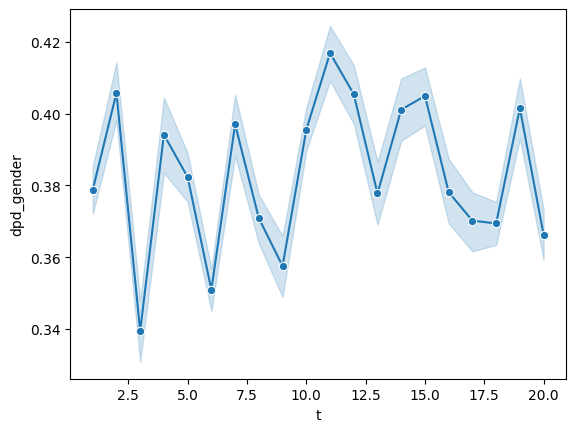

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

sns.lineplot(ax = ax,
                data = df_baseline,
                x =  df_baseline.index.get_level_values('t'),
                y = df_baseline['dpd_gender'],
                marker = 'o')

# plt.ylim(0,0.2)
# plt.xlim(0,50)

plt.show()

In [ ]:
# parameters = {
#     'my_parameter':42,
#     'agents':500,
#     'steps':100,
#     'wealth_appeal_corr': 0, # >0 more wealth higher appeal chance
#     'acc': 0.8, # accuracy of fraud prdediction
#     'appeal_wealth': ap.IntRange(0.25,0.3), # minimal wealth needed for appeal (could also become a param for distr. eventually)
#     #'wealth_impact'
#     'clf': 'hist', # None, 'hist'
#     'expi': None
    
# }
# sample = ap.Sample(parameters, n=1)
# model_baseline = VirusModel(parameters)
# exp = ap.Experiment(VirusModel, sample, iterations =2, record = True)
# results_baseline = exp.run() 
# df_baseline = results_baseline['variables']['Person']


In [ ]:
df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])
# df_baseline[df_baseline['fraud_pred'] ==0]['wealth'].min()

df_baseline.head() 
df_baseline = df_baseline[df_baseline.fraud_pred != -1]
# df_baseline[df_baseline['misclassifications'] == 0]
df_baseline.head() 

/var/folders/_3/m4zxq5yx589d0965c6l5j1q80000gp/T/ipykernel_90940/1515005289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['misclassifications'] = (df_baseline['fraud_pred'] - df_baseline['fraud'])


wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                       
0         1      1  0.286444  0.37454           0      0     0       0   
                 2  0.294649  0.37454           0      1     0       0   
                 3  0.303330  0.37454           0      1     0       0   
                 4  0.312531  0.37454           0      0     0       0   
                 5  0.322299  0.37454           0      0     0       0   

                    convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                          
0         1      1          0    0.500000  0.453488    0.500000  0.453488   
                 2          0    0.575758  0.534884    0.575758  0.534884   
                 3          0    0.509091  0.520930    0.509091  0.520930   
                 4          0    0.349650  0.437500    0.349650  0.437500   
                 5          0    0.316327  0.396226    0.316327  0.396226   

                    misclassifications  
iteration obj_id t                      
0         1      1                   0  
                 2                  -1  
                 3                  -1  
                 4                   0  
                 5                   0

In [ ]:
y_true = list(df_baseline['fraud'])
y_pred = list(df_baseline['fraud_pred'])

gender = df_baseline['gender']

len(y_true)

print(demographic_parity_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_true, y_pred=y_pred, sensitive_features=gender)




0.48806392480006167


0.427455965306772

In [ ]:
df_baseline

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                        
0         1      1   0.286444  0.37454           0      0     0       0   
                 2   0.294649  0.37454           0      1     0       0   
                 3   0.303330  0.37454           0      1     0       0   
                 4   0.312531  0.37454           0      0     0       0   
                 5   0.322299  0.37454           0      0     0       0   
...                       ...      ...         ...    ...   ...     ...   
19        100    16  0.000000  0.37454           1      0     0       0   
                 17  0.000000  0.37454           1      0     0       0   
                 18  0.000000  0.37454           1      0     0       0   
                 19  0.000000  0.37454           1      1     0       0   
                 20  0.000000  0.37454           1      1     0       0   

                     convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                           
0         1      1           0    0.500000  0.453488    0.500000  0.453488   
                 2           0    0.575758  0.534884    0.575758  0.534884   
                 3           0    0.509091  0.520930    0.509091  0.520930   
                 4           0    0.349650  0.437500    0.349650  0.437500   
                 5           0    0.316327  0.396226    0.316327  0.396226   
...                        ...         ...       ...         ...       ...   
19        100    16          1    0.746667  0.000000    0.746667  0.000000   
                 17          1    0.838710  0.812500    0.838710  0.812500   
                 18          1    0.372000  0.638298    0.372000  0.638298   
                 19          1    0.656250  0.858065    0.656250  0.858065   
                 20          1    0.824176  0.536585    0.824176  0.536585   

                     misclassifications  
iteration obj_id t                       
0         1      1                    0  
                 2                   -1  
                 3                   -1  
                 4                    0  
                 5                    0  
...                                 ...  
19        100    16                   1  
                 17                   1  
                 18                   1  
                 19                   0  
                 20                   0  

[40000 rows x 12 columns]

In [ ]:
from fairlearn.preprocessing import CorrelationRemover

import pandas as pd

from fairlearn.datasets import fetch_diabetes_hospital

X = df_baseline[['race', 'gender', 'wealth', 'health']]

cr = CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

cr.fit(X)
CorrelationRemover(sensitive_feature_ids=['race', 'gender'])

X_transform = cr.transform(X)

s = StandardScaler()

s.fit(X)

StandardScaler()

In [ ]:
# from fairlearn.preprocessing import CorrelationRemover

# import pandas as pd

# from fairlearn.datasets import fetch_diabetes_hospital

# data = fetch_diabetes_hospital()

# X = data.data[["race", "time_in_hospital", "had_inpatient_days", "medicare"]]

# X = pd.get_dummies(X)

# X = X.drop(["race_Asian",

#                     "race_Caucasian",

#                     "race_Hispanic",

#                     "race_Other",

#                     "race_Unknown",

#                     "had_inpatient_days_False",

#                     "medicare_False"], axis=1)

# cr = CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# cr.fit(X)
# CorrelationRemover(sensitive_feature_ids=['race_AfricanAmerican'])

# X_transform = cr.transform(X)


              0         1
0      0.281110  0.340955
1      0.289315  0.340955
2      0.297997  0.340955
3      0.307198  0.340955
4      0.316965  0.340955
...         ...       ...
39995 -0.005334  0.340955
39996 -0.005334  0.340955
39997 -0.005334  0.340955
39998 -0.005334  0.340955
39999 -0.005334  0.340955

[40000 rows x 2 columns]
              0         1
0      0.281110  0.340955
1      0.289315  0.340955
2      0.297997  0.340955
3      0.307198  0.340955
4      0.316965  0.340955
...         ...       ...
39995 -0.005334  0.340955
39996 -0.005334  0.340955
39997 -0.005334  0.340955
39998 -0.005334  0.340955
39999 -0.005334  0.340955

[40000 rows x 2 columns]


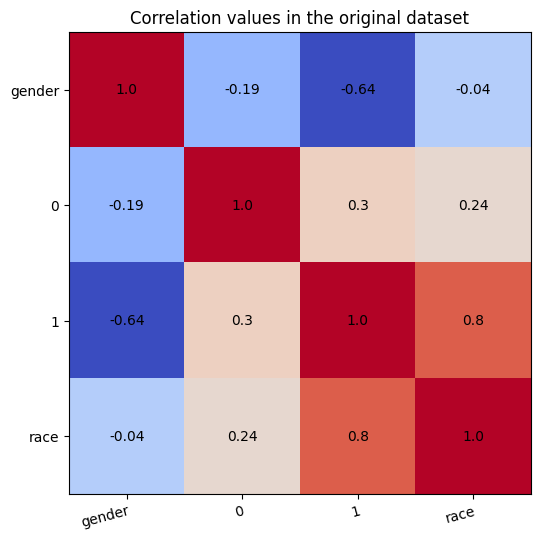

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from fairlearn.datasets import fetch_diabetes_hospital
from fairlearn.preprocessing import CorrelationRemover


def plot_heatmap(df,y, title):
    df["race"] = list(y)
    # df = df.rename(columns={"had_inpatient_days_True": "had_inpatient_days"})
    cols = list(df.columns)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(round(df.corr(), 2), cmap="coolwarm")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(cols)), labels=cols)
    ax.set_yticks(np.arange(len(cols)), labels=cols)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=15, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cols)):
        for j in range(len(cols)):
            ax.text(
                j,
                i,
                round(df.corr().to_numpy()[i, j], 2),
                ha="center",
                va="center",
            )

    ax.set_title(f"{title}")
    plt.show()

X_transform = pd.DataFrame(X_transform)
Xt = copy.deepcopy(X_transform)
print(X_transform)
Xt.insert(0,'gender', list(X['gender']))
print(X_transform)


plot_heatmap(pd.DataFrame(Xt),X['race'], "Correlation values in the original dataset")
# plot_heatmap(X,X['gender'], "Correlation values after CorrelationRemover")
# plot_heatmap(X_cr_alpha, "Correlation values after CorrelationRemover with alpha = 0.5")


In [ ]:
X = df_baseline[['race', 'gender', 'wealth', 'health']]
X.shape
pd.DataFrame(y_true).shape

(40000, 1)

In [ ]:
from fairlearn.reductions import DemographicParity

from fairlearn.metrics import MetricFrame, selection_rate

import numpy as np

import pandas as pd

dp = DemographicParity(difference_bound=0.01)

X,y = generate_init(train_clf = True, n = 10000, fraud_det = 0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y=y.rename(columns = {0:'y'})
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

df = pd.concat([X,y], axis =1)

# # Separate majority and minority classes
df_majority = df[df['y'] ==0]
df_minority = df[df['y'] ==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                replace=False,    
                                n_samples=4000)#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     
                                n_samples=4000)# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

# X = df_baseline[['fraud','wealth', 'gender', 'race']]


y = df_up_down_sampled['y']
X = df_up_down_sampled.drop('y', axis = 1)
X = X.rename(columns = {0: 'race', 1:'gender', 2:'wealth', 3:'health'})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

expgrad =  ExponentiatedGradient(GradientBoostingClassifier(), constraints=DemographicParity(),eps=0.1)

expgrad.fit(X_train, pd.DataFrame(y_train), sensitive_features= X_train['race'])






/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:325: RuntimeWarning: invalid value encountered in multiply
  lhs_ub = -np.ones_like(b_ub)*np.inf  # LHS of UB constraints is -inf
/Users/uni/miniconda3/envs/ma/lib/python3.10/site-packages/scipy/optimize/_linprog_highs.py:91: RuntimeWarning: invalid value encountered in multiply
  x[infs] = np.sign(x[infs])*CONST_INF


ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x14b21eda0>,
                      eps=0.1, estimator=GradientBoostingClassifier(),
                      nu=0.003122462667564371)

In [ ]:
y_pred = (expgrad.predict(X_test))

abs(y_pred - np.array(y_test).flatten()).sum()/len(y_pred)



0.386

Now just run it through the fairness metrics, not much better than without?? 

-> implement everything in clf_train

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# y_true = list(df_baseline['fraud'])
# y_pred = list(df_baseline['fraud_pred'])

gender = X_test['gender']

print(gender.shape)
print(np.array(y_true).shape)


print(demographic_parity_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender))
equalized_odds_ratio( y_true=y_test, y_pred=y_pred, sensitive_features=gender)




(2000,)
(40000,)
0.8222104099931458


0.8068480379693195